In [1]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as img
import keras
import math

11490434/11490434 [==============================] - 0s 0us/step


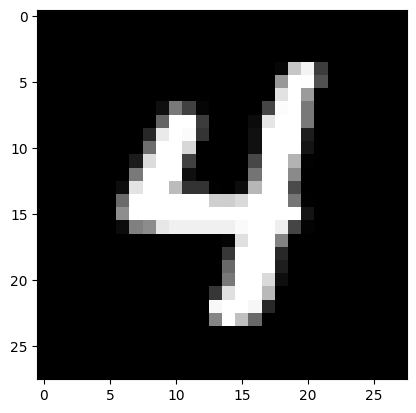

In [2]:
from keras.datasets import mnist
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()
idx=np.random.randint(0,60000)
image=x_train[idx]
plt.imshow(image, cmap='gray')

(array([640.,  17.,  14.,  18.,  15.,  11.,   0.,   0.,   0.,  69.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

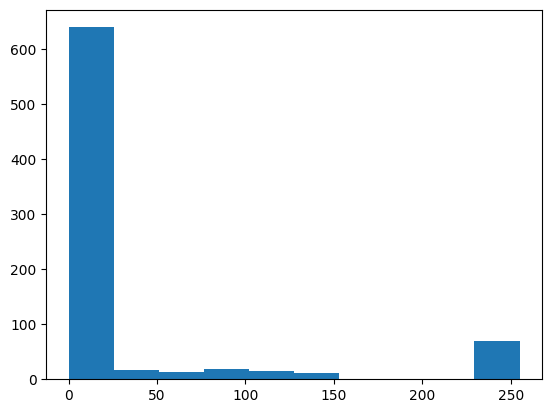

In [3]:
import numpy as np

def histogram_equalisation(image):
    hist, bins = np.histogram(image.flatten(), bins=256)
    cdf = hist.cumsum()
    normalized_cdf = (cdf-cdf.min())*255/(cdf.max()- cdf.min())
    equalized_image=np.interp(image.flatten(),bins[:-1],normalized_cdf)
    return equalized_image.reshape(image.shape)


histogram_equalisation_img= histogram_equalisation(image)
plt.hist(x=histogram_equalisation_img.flatten())

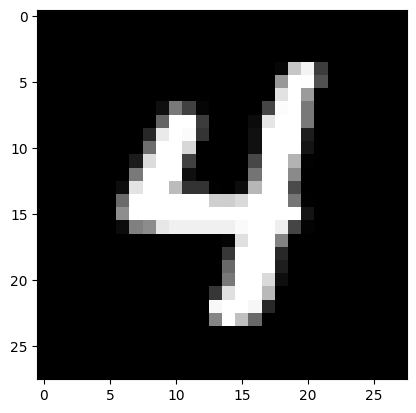

In [4]:
def histogram_stretching(image, r_min, r_max):
    min_pixel = np.min(image)
    max_pixel = np.max(image)
    #(desired diff / current diff) * (image - current min) + desired min
    stretched_image = ((r_max- r_min)/ (max_pixel - min_pixel)) * (image- min_pixel) + r_min
    stretched_image = np.clip(stretched_image, 0, 255)

    return stretched_image
plt.imshow(histogram_stretching(image, 0, 100), cmap='gray')